# Assignment 10
 Data Wrangling on Real Estate Market

In [ ]:
! pip install pandas numpy matplotlib

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [27]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [28]:
df1.shape

(13320, 9)

In [29]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [30]:
df1['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [31]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [32]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [33]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [34]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [35]:
df2.shape

(13320, 5)

In [36]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [37]:
df3.shape

(13246, 5)

In [38]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [39]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/yx/fbqgtypx3wz76xxzks5ywwh80000gn/T/ipykernel_61086/2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [40]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [41]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

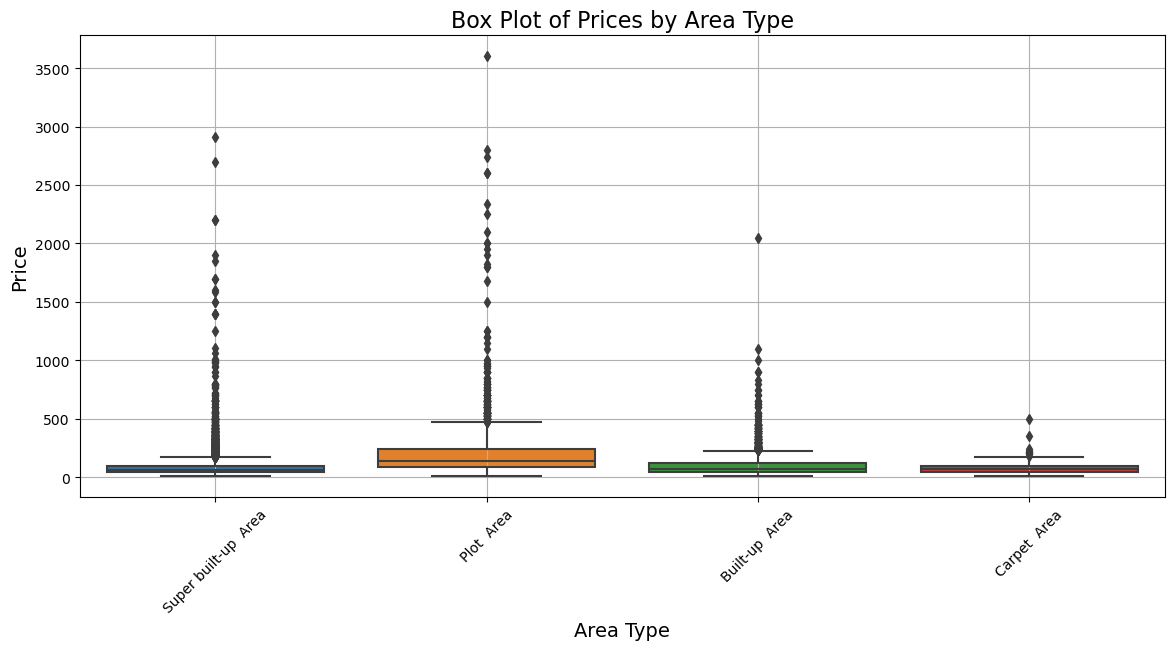

In [44]:
import seaborn as sns

# Step 1: Identify Outliers Using Box Plots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1, x='area_type', y='price')
plt.title('Box Plot of Prices by Area Type', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.show()

In [45]:
aggregated_data = df1.groupby('location').agg(
    mean_price=('price', 'mean'),
    median_price=('price', 'median'),
    count=('price', 'size')
).reset_index()

# Display the aggregated data
print("\nAggregated Data by Location:")
print(aggregated_data.sort_values(by='mean_price', ascending=False).head())



Aggregated Data by Location:
            location   mean_price  median_price  count
351      Cubbon Road  1900.000000        1900.0      1
145      Ashok Nagar  1486.000000        1486.0      2
362   Defence Colony  1167.714286         365.0      7
1265          Yemlur  1093.388889        1675.0      9
339    Church Street  1068.000000        1068.0      2


In [47]:


# Calculate average sale prices by neighborhood (location)
avg_price_by_location = df1.groupby('location')['price'].mean().reset_index()

# Calculate average sale prices by property type (area_type)
avg_price_by_area_type = df1.groupby('area_type')['price'].mean().reset_index()

# Calculate average sale prices by neighborhood and property type
avg_price_by_location_and_area_type = df1.groupby(['location', 'area_type'])['price'].mean().reset_index()

# Rename the columns for clarity
avg_price_by_location.rename(columns={'price': 'avg_price'}, inplace=True)
avg_price_by_area_type.rename(columns={'price': 'avg_price'}, inplace=True)
avg_price_by_location_and_area_type.rename(columns={'price': 'avg_price'}, inplace=True)

# Display the results
print("Average Sale Prices by Neighborhood:")
print(avg_price_by_location.sort_values(by='avg_price', ascending=False).head(10))

print("\nAverage Sale Prices by Property Type:")
print(avg_price_by_area_type.sort_values(by='avg_price', ascending=False))

print("\nAverage Sale Prices by Neighborhood and Property Type:")
print(avg_price_by_location_and_area_type.sort_values(by='avg_price', ascending=False).head(10))

Average Sale Prices by Neighborhood:
                 location    avg_price
351           Cubbon Road  1900.000000
145           Ashok Nagar  1486.000000
362        Defence Colony  1167.714286
1265               Yemlur  1093.388889
339         Church Street  1068.000000
354        D Souza Layout  1015.000000
1022      Sadashiva Nagar  1011.100000
1081        Sindhi Colony   988.000000
1103      Srinivas Colony   922.000000
61    5th Block Jayanagar   905.000000

Average Sale Prices by Property Type:
              area_type   avg_price
2            Plot  Area  208.495486
0        Built-up  Area  104.285498
3  Super built-up  Area   92.971757
1          Carpet  Area   89.502356

Average Sale Prices by Neighborhood and Property Type:
                   location             area_type  avg_price
657          Defence Colony            Plot  Area    3200.00
1852        Sadashiva Nagar            Plot  Area    2736.00
732          Dollars Colony            Plot  Area    2300.00
637            